In [ ]:
#Code to compute the internal energy change during impulsive encounter along straight orbit for a triaxial perturber

#Computes and plots non-perturbative \Delta E_{int} as a function of axis ratios for different impact parameters

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import math
import random
from matplotlib.patches import Rectangle
from matplotlib import cm
import matplotlib.colors as colors
from matplotlib.pylab import *
from matplotlib.colors import LogNorm
import matplotlib.ticker as mtick
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import matplotlib.ticker as ticker
from matplotlib.patches import BoxStyle
from scipy import integrate
from scipy import optimize
from scipy.optimize import fsolve
from scipy.interpolate import CubicSpline
from scipy.special import erf as errorfunc
from scipy.special import gamma, factorial
from scipy.signal import argrelextrema 
from matplotlib import cm
from numpy import linalg
import time
import os
import h5py
from straight_functions_triaxial_perturber import *

#-----------------------------------------------------------------



In [38]:
#-------Input parameters-------

Nb=3                           #No of points in impact parameter range
bmin=1e0                       #Minimum impact parameter
bmax=1e2                       #Maximum impact parameter

rp=1e1                         #Perturber scale radius along z in units of rs

Rc=1e0                         #Truncation radius in units of rs
rmax=300                       #Maximum radius for integration over subject profile; should be at least 2 times bmax

perturber_flag=2               #perturber_flag: 2: Triaxial log
subject_flag=1                 #subject_flag: 1: Plummer sphere, 2: Hernquist sphere, 3: NFW



Nq=50                          #No of points in axis ratio

#Keeping q2 fixed
q1min=0.1
q1max=10
q1=np.logspace(np.log10(q1min),np.log10(q1max),num=Nq) #Axis ratio q2: x/z
q2=1                                                   #Axis ratio q1: y/z

#Keeping q1 fixed
'''q1=1                                                   #Axis ratio q1: x/z
q2min=0.1
q2max=10
q2=np.logspace(np.log10(q2min),np.log10(q2max),num=Nq) #Axis ratio q2: y/z'''

#Varying both q1 and q2 such that q1=q2
'''q1min=0.1
q1max=10
q1=np.logspace(np.log10(q1min),np.log10(q1max),num=Nq) #Axis ratio q2: x/z
q2min=0.1
q2max=10
q2=np.logspace(np.log10(q2min),np.log10(q2max),num=Nq) #Axis ratio q1: y/z'''

#-----------------------------------------------------------------

'q1min=0.1\nq1max=10\nq1=np.logspace(np.log10(q1min),np.log10(q1max),num=Nq) #Axis ratio q2: x/z\nq2min=0.1\nq2max=10\nq2=np.logspace(np.log10(q2min),np.log10(q2max),num=Nq) #Axis ratio q1: y/z'

In [39]:
#-------Non-perturbative internal energy change as a function of axis-ratio-------

impact=np.logspace(np.log10(bmin),np.log10(bmax),num=Nb) #Impact parameters

E=np.zeros((Nq,Nb))
Etrunc=np.zeros((Nq,Nb))
Ecm=np.zeros((Nq,Nb))
Ecmtrunc=np.zeros((Nq,Nb))
Eint=np.zeros((Nq,Nb))
Eint_trunc=np.zeros((Nq,Nb))

start=time.time()

for i in range(Nb):   
    for j in range(Nq):
        E[j][i]=F_triaxial(impact[i],rmax,rp,q1[j],q2,perturber_flag,subject_flag)
        Ecm[j][i]=Fcm_triaxial(impact[i],rmax,rp,q1[j],q2,perturber_flag,subject_flag)
        Etrunc[j][i]=F_triaxial(impact[i],Rc,rp,q1[j],q2,perturber_flag,subject_flag)
        Ecmtrunc[j][i]=Fcm_triaxial(impact[i],Rc,rp,q1[j],q2,perturber_flag,subject_flag)
        '''E[j][i]=F_triaxial(impact[i],rmax,rp,q1,q2[j],perturber_flag,subject_flag)
        Ecm[j][i]=Fcm_triaxial(impact[i],rmax,rp,q1,q2[j],perturber_flag,subject_flag)
        Etrunc[j][i]=F_triaxial(impact[i],Rc,rp,q1,q2[j],perturber_flag,subject_flag)
        Ecmtrunc[j][i]=Fcm_triaxial(impact[i],Rc,rp,q1,q2[j],perturber_flag,subject_flag)'''
        '''E[j][i]=F_triaxial(impact[i],rmax,rp,q1[j],q2[j],perturber_flag,subject_flag)
        Ecm[j][i]=Fcm_triaxial(impact[i],rmax,rp,q1[j],q2[j],perturber_flag,subject_flag)
        Etrunc[j][i]=F_triaxial(impact[i],Rc,rp,q1[j],q2[j],perturber_flag,subject_flag)
        Ecmtrunc[j][i]=Fcm_triaxial(impact[i],Rc,rp,q1[j],q2[j],perturber_flag,subject_flag)'''
        
        Eint_trunc[j][i]=Etrunc[j][i]-Ecmtrunc[j][i]
        Eint[j][i]=E[j][i]-Ecm[j][i]
        end=time.time()
        print ("%d\t%d\tTime taken: %f s\n" %(i,j,abs(end-start)))
    

0	0	Time taken: 197.211888 s

0	1	Time taken: 309.540920 s

0	2	Time taken: 355.538868 s

0	3	Time taken: 380.482302 s

0	4	Time taken: 412.389897 s

0	5	Time taken: 437.510405 s

0	6	Time taken: 458.574208 s

0	7	Time taken: 479.374016 s

0	8	Time taken: 498.973470 s

0	9	Time taken: 518.546921 s

0	10	Time taken: 535.872043 s

0	11	Time taken: 550.234580 s

0	12	Time taken: 563.043588 s

0	13	Time taken: 575.768613 s

0	14	Time taken: 587.660535 s

0	15	Time taken: 599.616603 s

0	16	Time taken: 611.348591 s

0	17	Time taken: 622.397775 s

0	18	Time taken: 631.519776 s

0	19	Time taken: 639.668154 s

0	20	Time taken: 646.800442 s

0	21	Time taken: 653.510812 s

0	22	Time taken: 659.016048 s

0	23	Time taken: 663.611117 s

0	24	Time taken: 668.486175 s

0	25	Time taken: 673.366250 s

0	26	Time taken: 678.372680 s

0	27	Time taken: 684.746123 s

0	28	Time taken: 691.695758 s

0	29	Time taken: 699.119800 s

0	30	Time taken: 707.010135 s

0	31	Time taken: 715.112794 s

0	32	Time taken: 7

In [33]:
#-------Writing the data in a file-------

hf = h5py.File('impulsive_straight_orbit_q1_triaxialperturber%d_subject%d.h5' %(perturber_flag,subject_flag), 'w')
#hf = h5py.File('impulsive_straight_orbit_q2_triaxialperturber%d_subject%d.h5' %(perturber_flag,subject_flag), 'w')
#hf = h5py.File('impulsive_straight_orbit_q1q2_triaxialperturber%d_subject%d.h5' %(perturber_flag,subject_flag), 'w')
hf.create_dataset('impact', data=impact)
hf.create_dataset('q1', data=q1)
hf.create_dataset('q2', data=q2)
hf.create_dataset('Eint', data=Eint)
hf.create_dataset('Eint_trunc', data=Eint_trunc)
hf.close()

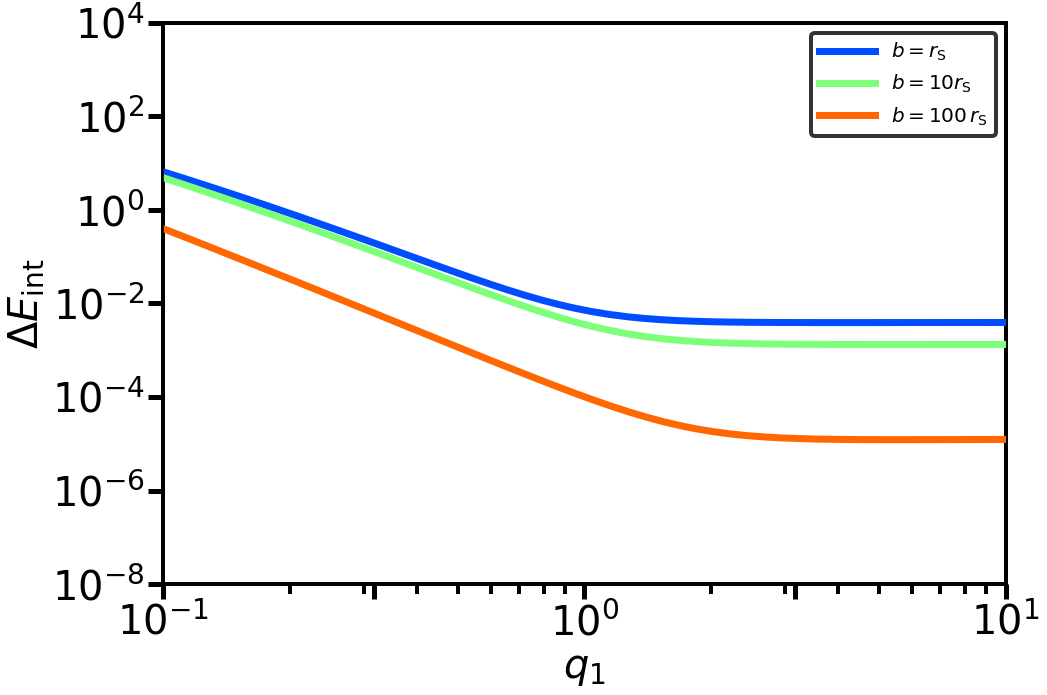

In [40]:
#-------Plots-------

icolors=np.linspace(0.2,0.8,Nb)
colors=[cm.jet(y) for y in icolors]

fig,ax=plt.subplots(figsize=(15,10))
plt.subplots_adjust(top=0.95,bottom=0.17,left=0.17,right=0.95)

ax.loglog(q1,Eint[:,0],color=colors[0],lw=7,label='$b=r_{\mathrm{S}}$')
ax.loglog(q1,Eint[:,1],color=colors[1],lw=7,label='$b=%.0fr_{\mathrm{S}}$' %(impact[1]))
ax.loglog(q1,Eint[:,2],color=colors[2],lw=7,label='$b=%.0f\,r_{\mathrm{S}}$' %(impact[2]))
#ax.loglog(q2,Eint[:,0],color=colors[0],lw=7,label='$b=r_{\mathrm{S}}$')
#ax.loglog(q2,Eint[:,1],color=colors[1],lw=7,label='$b=%.0f\,r_{\mathrm{S}}$' %(impact[1]))
#ax.loglog(q2,Eint[:,2],color=colors[2],lw=7,label='$b=%.0f\,r_{\mathrm{S}}$' %(impact[2]))

#ax.loglog(q1,Eint_trunc[:,0],color=colors[0],lw=7,label='$b=r_{\mathrm{S}}$')
#ax.loglog(q1,Eint_trunc[:,1],color=colors[1],lw=7,label='$b=%.0f\,r_{\mathrm{S}}$' %(impact[1]))
#ax.loglog(q1,Eint_trunc[:,2],color=colors[2],lw=7,label='$b=%.0f\,r_{\mathrm{S}}$' %(impact[2]))
#ax.loglog(q1,Eint[:,0],color=colors[0],lw=7,label='$b=r_{\mathrm{S}}$')
#ax.loglog(q1,Eint[:,1],color=colors[1],lw=7,label='$b=%.0f\,r_{\mathrm{S}}$' %(impact[1]))
#ax.loglog(q1,Eint[:,2],color=colors[2],lw=7,label='$b=%.0f\,r_{\mathrm{S}}$' %(impact[2]))

ax.tick_params(which='major', width=5, length=15, color='k')
ax.tick_params(which='minor', width=4, length=10, color='k')
#ax.set_xticks(np.logspace(np.log10(q2min),np.log10(q2max),num=5))
ax.set_xticks(np.logspace(np.log10(q1min),np.log10(q1max),num=5))
#ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#ax.get_yaxis().set_major_formatter(matplotlib.ticker.NullFormatter())
ax.set_yticks(np.logspace(np.log10(1e-8),np.log10(1e4),num=7))
#ax.set_xlim([q2min,q2max])
ax.set_xlim([q1min,q1max])

ax.set_ylim([1e-8,1e4])
ax.tick_params(labelsize=40)
#ax.set_xlabel('$q_2$',fontsize=40)
ax.set_xlabel('$q_1$',fontsize=40)
ax.set_ylabel('$\Delta E_{\mathrm{int}}$',fontsize=40)

leg=ax.legend(loc=1,fontsize=20,handlelength=2.8)
leg.get_frame().set_edgecolor('k')
leg.get_frame().set_linewidth('4')
ax.patch.set_edgecolor('k')  
ax.patch.set_linewidth('4')

#fig.text(0.195, 0.23, '$r_{\mathrm{trunc}}/r_{\mathrm{S}}=%.0f$' %(Rc), bbox=dict(boxstyle='round', facecolor='none', edgecolor='black', linewidth=4, pad=0.2, alpha=1), fontsize=40)

plt.savefig('impulsive_encounter_q1_rtrunc%.4f_triaxialperturber%d_subject%d_rp.jpg' %(Rc,perturber_flag,subject_flag))
#plt.savefig('impulsive_encounter_q2_rtrunc%.4f_triaxialperturber%d_subject%d_rp.jpg' %(Rc,perturber_flag,subject_flag))
#plt.savefig('impulsive_encounter_q1q2_rtrunc%.4f_triaxialperturber%d_subject%d_rp.jpg' %(Rc,perturber_flag,subject_flag))

plt.show()